<a href="https://colab.research.google.com/github/rioAgustian/Numerical-Analysis/blob/main/Interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolasi**

**Rio Agustian Gilang Fernando, 4211420004, Fisika**

**Fakultas Matematika dan Ilmu Pengetahuan Alam**

**Universitas Negeri Semarang**



---



## **1. Interpolasi Newton**

Bentuk polinomial newton adalah sebagai berikut.

\begin{align}
p_n (x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots \\
+ a_n(x-x_0)(x-x_1)\dots(x-x_n)
\end{align}

Nilai dari koefisien $a_n$ adalah

\begin{align}
a_1 = \frac{y_1 - y_0}{x_1 - x_0} = f[x_1 , x_0]
\end{align}

\begin{align}
a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_0} = f[x_2, x_1 , x_0] 
\end{align}

Dengan demikian, dapat dibuat sebuah matriks dengan nilai


\begin{split}
\begin{array}{cccccc}
 y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
 y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
 y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
 y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
 y_4 & 0 & 0 & 0  & 0  \\
\end{array}
\end{split}

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# data yang akan diinterpolasi
x = np.array([1, 3, 5, 7])
y = np.array([7, 13, 5, -7])

n = len(y)
koef = np.zeros([n, n])

# kolom pertama dibuat sebagai y
koef[:, 0] = y

# menghitung fn[x1,x2,...,xn]
for j in range(1, n):
    for i in range(n-j):
        koef[i][j] = (koef[i+1][j-1] - koef[i][j-1]) / (x[i+j]-x[i])

# koefisien interpolasi Newton
x1 = koef[0, :]
print(x1)

[ 7.          3.         -1.75        0.20833333]


Misal, interpolasi yang akan dipakai adalah interpolasi orde-3. Bentuk polinomialnya adalah sebagai berikut.

\begin{align}
p_n (x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + a_3(x-x_0)(x-x_1)(x-x_3)
\end{align}

Dapat dibuat iterasi dengan bentuk



```
n = banyak data - 1 
p = a3
for k in range(1, n+1):
  p = koef[n-k] + (x - x_data[n-k]) * p
```

Keluaranya untuk setiap iterasi adalah 

Iterasi ke-1

\begin{align}
f_1 (x) = a_2 + (x-x_2) a_3 
\end{align}

Iterasi ke-2

\begin{align}
f_2 (x) & = a_1 + (x-x_1) f_1(x) \\
f_2 (x) & = a_1 + (x-x_1) (a_2 + (x-x_2) a_3) \\
f_2 (x) & = a_1 + a_2 (x-x_1)  +  a_3 (x-x_1)(x-x_2)
\end{align}

Iterasi ke-3

\begin{align}
f_3 (x) & = a_0 + (x-x_0) f_2(x) \\
f_3 (x) & = a_0 + (x-x_0) (a_1 + a_2 (x-x_1)  +  a_3 (x-x_1)(x-x_2)) \\
f_3 (x) & = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + a_3(x-x_0)(x-x_1)(x-x_3)
\end{align}

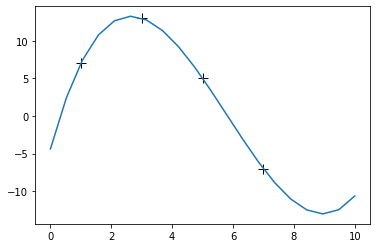

In [49]:
# interpolasi di titik "t"
t = np.linspace(0, 10, 20)

n = len(x) - 1 
p = x1[n]
for k in range(1, n+1):
  p = x1[n-k] + (t - x[n-k]) * p

# titik-titik hasil interpolasi
y_int = p

# plotting 
plt.plot(x, y, "k+", markersize=10)
plt.plot(t, y_int); plt.show()

In [50]:
# menyederhanakan kode
def new_interp(x, y, t, plot=True):
  """
  Menghitung nilai interpolasi di titik yang ditentukan 
  menggunakan interpolasi Newton.

  Parameters
  ----------
  x : variabel independen / x-axis
  y : variabel dipenden / y-axis
  t : titik interpolasi yang diinginkan
  """
  # menentukan koefisien polinom
  n = len(y)
  koef = np.zeros([n, n])
  koef[:, 0] = y
  for j in range(1, n):
      for i in range(n-j):
          koef[i][j] = (koef[i+1][j-1] - koef[i][j-1]) / (x[i+j]-x[i])
  c = koef[0, :]

  # menghitung interpolasi di "t"
  n = len(x) - 1 
  p = c[n]
  for k in range(1, n+1):
    p = c[n-k] + (t - x[n-k]) * p
  
  # plotting
  if plot == True:
    plt.scatter(x, y, color="red", marker="+", s=200)
    plt.plot(t, p)
    plt.show()
  else:
    return p

help(new_interp)

Help on function new_interp in module __main__:

new_interp(x, y, t, plot=True)
    Menghitung nilai interpolasi di titik yang ditentukan 
    menggunakan interpolasi Newton.
    
    Parameters
    ----------
    x : variabel independen / x-axis
    y : variabel dipenden / y-axis
    t : titik interpolasi yang diinginkan



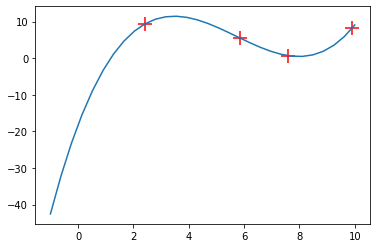

In [51]:
# tes function yang telah dibuat
x = np.random.uniform(0, 10, 4)
y = np.random.uniform(0, 10, 4)
t = np.linspace(-1, 10, 30)

new_interp(x, y, t, plot=True)

### **Referensi**




1. *Interpolasi Newton Dalam Python*. Diunggah oleh 
Yoyok Adisetio Laksono, 20 April 2021. https://youtu.be/qZtw1c_ZvKg

2. *Math 452, Numerical Methods: Polynomial Interpolation Python Programs.* http://math.oit.edu/~paulr/Upper/Math_45x/Math_452/interpolation.pdf


3. *Metode Numerik - 8. Polinom Newton (Coding menggunakan Python)*. Diunggah oleh Kodepy Coding, 4 November 2020. https://youtu.be/EfvzERO4fkM

4. Munir, Rinaldi. (2021). *Metode Numerik (Revisi Kelima)*. Bandung: Institut Teknologi Bandung.

5. Kong, Q., Siauw, T., dan Bayen, A. (2020). *Newton’s Polynomial Interpolation.* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html





## **2. Interpolasi Lagrange**

Bentuk polinomial Lagrange adalah sebagai berikut.

\begin{align}
p_n (x) = y_0 L_0(x) +  y_1 L_1(x) +  y_2 L_2(x) + \dots +  y_n L_n(x)
\end{align}

dengan

\begin{align}
L_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j}
\end{align}

Misal, interpolasi yang akan dipakai adalah inyerpolasi orde-3. Bentuk polinomialnya adalah sebagai berikut.

\begin{align}
p_n (x) = y_0 L_0(x) +  y_1 L_1(x) +  y_2 L_2(x) +  y_3 L_n(x)
\end{align}

Dapat dibuat iterasi dalam bentuk



```
n = banyak data
y_pol = 0
for i in range(n):
    p = 1
    for j in range(n):
        if i != j:
            p = p * (t - x[j])/(x[i] - x[j])
    y_pol = y_pol + p * y[i] 
```

Keluaranya untuk setiap iterasi ```j``` dengan ```i = 0``` adalah 

Iterasi ke-1

\begin{align}
p_1 (x) = \frac{(x-x_1)}{(x_0-x_1)}
\end{align}

Iterasi ke-2

\begin{align}
p_2 (x) &= p_1(x) \frac{(x-x_2)}{(x_0-x_2)} \\
p_2 (x) &= \frac{(x-x_1)}{(x_0-x_1)} \frac{(x-x_2)}{(x_0-x_1)}
\end{align}

Iterasi ke-3

\begin{align}
p_3 (x) &= p_2(x) \frac{(x-x_3)}{(x_0-x_3)} \\
p_3 (x) &= \frac{(x-x_1)}{(x_0-x_1)} \frac{(x-x_2)}{(x_0-x_2)} \frac{(x-x_3)}{(x_0-x_3)}
\end{align}

Keluaranya untuk setiap iterasi ```j``` dengan ```i = 1``` adalah 

Iterasi ke-1

\begin{align}
p_1 (x) = \frac{(x-x_0)}{(x_1-x_0)}
\end{align}

Iterasi ke-2

\begin{align}
p_2 (x) &= \frac{(x-x_0)}{(x_1-x_0)} \frac{(x-x_2)}{(x_1-x_1)}
\end{align}

Iterasi ke-3

\begin{align}
p_3 (x) &= \frac{(x-x_0)}{(x_1-x_0)} \frac{(x-x_2)}{(x_1-x_2)} \frac{(x-x_3)}{(x_1-x_3)}
\end{align}

In [52]:
def lag_interp(x, y, t, plot=True):
  """
  Menghitung nilai interpolasi di titik yang ditentukan 
  menggunakan interpolasi Lagrange. 

  Parameters
  ----------
  x : variabel independen / x-axis
  y : variabel dipenden / y-axis
  t : titik interpolasi yang diinginkan
  """
  n = len(x)
  y_pol = 0
  for i in range(n):
      p = 1
      for j in range(n):
          if i != j:
              p = p * (t - x[j])/(x[i] - x[j])
      y_pol = y_pol + p * y[i]  

  # plotting  
  if plot == True:
    plt.scatter(x, y, color="red", marker="+", s=200)
    plt.plot(t, y_pol)
    plt.show()
  else:
    return y_pol

help(lag_interp)

Help on function lag_interp in module __main__:

lag_interp(x, y, t, plot=True)
    Menghitung nilai interpolasi di titik yang ditentukan 
    menggunakan interpolasi Lagrange. 
    
    Parameters
    ----------
    x : variabel independen / x-axis
    y : variabel dipenden / y-axis
    t : titik interpolasi yang diinginkan



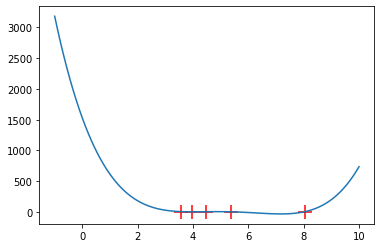

In [53]:
# tes function yang telah dibuat
x = np.random.uniform(0, 10, 5)
y = np.random.uniform(0, 10, 5)
t = np.linspace(-1, 10, 100)

lag_interp(x, y, t)

### **Referensi**

1. Code Sansar. *Python Program for Lagrange Interpolation Method (with Output).* https://www.codesansar.com/numerical-methods/python-program-lagrange-interpolation-method.htm

2. Lambers, Jim. (2010). *Lagrange Interpolation*. https://www.math.usm.edu/lambers/mat772/fall10/lecture5.pdf
3. Munir, Rinaldi. (2021). *Metode Numerik (Revisi Kelima)*. Bandung: Institut Teknologi Bandung.

4. Kong, Q., Siauw, T., dan Bayen, A. (2020). *Lagrange Polynomial Interpolation.* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html